<a href="https://colab.research.google.com/github/KJ-black/Machine-Learning-on-Material-Informatics/blob/main/HW6_clustering/louvain_modularity_clustering_by_geodesic_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

## Load Data Points

In [15]:
import numpy as np
import pandas as pd
import scipy.io

XYZ_Coord = scipy.io.loadmat('data/XYZcoord1.mat')
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
XYZ_C

array([[ 0.6851533 ,  1.17897583,  3.52402492],
       [ 1.00216962,  1.21572705, 29.32701994],
       [ 1.15125728,  3.32476951, 23.614195  ],
       ...,
       [90.13576705, 15.58773776, 34.16825421],
       [90.73121678, 16.76765189, 13.4218382 ],
       [89.09981586, 18.50040944, 13.39066304]])

### Visualize Data Points

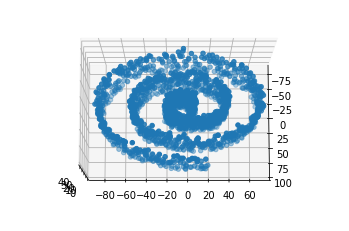

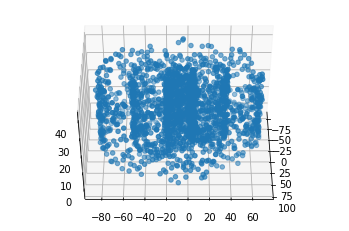

In [16]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
ax.scatter(x, y, z, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
ax.scatter(x, y, z, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)

## Load Data Edges ( Geodesic Distance )

In [17]:
XYZ_Edges = pd.read_csv('data/Geodesic_Edges.csv')
XYZ_Edges

,Source,Target,Weight,Type
0,1,5,1.253704,Undirected
1,1,14,1.277093,Undirected
2,1,16,0.345464,Undirected
3,1,17,0.288327,Undirected
4,1,19,0.249381,Undirected
...,...,...,...,...
6031,1995,2000,0.104098,Undirected
6032,1996,1997,0.213520,Undirected
6033,1997,1999,0.154084,Undirected
6034,1997,2000,0.140709,Undirected


In [18]:
XYZ_E = np.array(XYZ_Edges.iloc[:, 0:3].values)
XYZ_E

array([[1.0000000e+00, 5.0000000e+00, 1.2537038e+00],
       [1.0000000e+00, 1.4000000e+01, 1.2770934e+00],
       [1.0000000e+00, 1.6000000e+01, 3.4546397e-01],
       ...,
       [1.9970000e+03, 1.9990000e+03, 1.5408415e-01],
       [1.9970000e+03, 2.0000000e+03, 1.4070934e-01],
       [1.9990000e+03, 2.0000000e+03, 4.2014991e-01]])

# Construct the Network using networkx

Use the following command to install required package.
<br>`pip install python-louvain networkx`
- [Community detection for NetworkX’s documentation](https://python-louvain.readthedocs.io/en/latest/index.html)
- [Software for Complex Networks](https://networkx.github.io/documentation/stable/index.html)

In [19]:
from community import community_louvain
import networkx as nx

# Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph() # Construct no direct graph
for i in range(0, len(XYZ_E)):    
    e = ( str(int(XYZ_E[i,0])), str(int(XYZ_E[i,1])), XYZ_E[i,2] ) # e = ( node1, node2, weight )
    G.add_weighted_edges_from([(e)])    

## Visaulize the Original Grpah

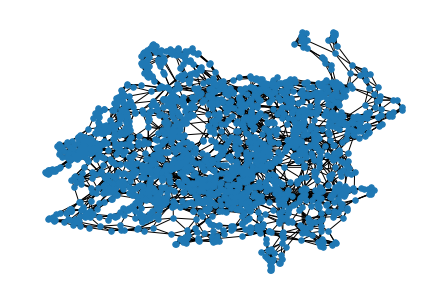

In [20]:
nx.draw(G, node_size=30)

## Partition the Graph

In [21]:
partition = community_louvain.best_partition(G)
print(partition)
size = float(len(set(partition.values())))
print("community:", size) # number of groups that was partitioned
mod = community_louvain.modularity(partition,G)
print("modularity:", mod)

{'1': 0, '5': 0, '14': 0, '16': 0, '17': 0, '19': 0, '25': 0, '58': 0, '2': 1, '8': 2, '15': 1, '22': 1, '27': 1, '41': 1, '44': 1, '3': 1, '6': 1, '18': 1, '21': 1, '26': 1, '33': 1, '35': 1, '45': 1, '56': 1, '4': 3, '7': 3, '11': 3, '29': 3, '32': 3, '37': 3, '49': 3, '52': 3, '68': 3, '92': 0, '39': 3, '70': 1, '9': 2, '10': 2, '24': 2, '59': 1, '20': 2, '46': 2, '79': 2, '31': 2, '74': 2, '12': 0, '13': 0, '34': 0, '36': 0, '53': 0, '90': 0, '62': 0, '23': 1, '30': 1, '66': 0, '43': 2, '54': 2, '73': 2, '121': 2, '63': 0, '77': 1, '84': 1, '102': 1, '28': 1, '61': 1, '64': 1, '67': 1, '108': 1, '89': 2, '91': 2, '60': 3, '76': 3, '57': 0, '55': 3, '47': 3, '51': 3, '72': 3, '82': 3, '38': 3, '42': 3, '48': 3, '96': 3, '78': 4, '40': 4, '50': 4, '69': 4, '80': 4, '85': 1, '106': 4, '112': 4, '95': 2, '71': 2, '94': 3, '103': 3, '124': 3, '99': 3, '65': 0, '93': 0, '81': 1, '75': 0, '87': 0, '88': 0, '97': 1, '134': 5, '113': 0, '110': 0, '131': 4, '144': 4, '129': 0, '100': 1, '109

### See each community's members

In [22]:
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)

Community 0
['1', '5', '14', '16', '17', '19', '25', '58', '92', '12', '13', '34', '36', '53', '90', '62', '66', '63', '57', '65', '93', '75', '87', '88', '113', '110', '129', '83', '86', '115', '122', '126', '98', '111', '116', '117', '127', '119', '104', '114', '128', '139', '163', '168', '185', '197', '179', '207']
Community 1
['2', '15', '22', '27', '41', '44', '3', '6', '18', '21', '26', '33', '35', '45', '56', '70', '59', '23', '30', '77', '84', '102', '28', '61', '64', '67', '108', '85', '81', '97', '100', '109']
Community 2
['8', '9', '10', '24', '20', '46', '79', '31', '74', '43', '54', '73', '121', '89', '91', '95', '71', '105']
Community 3
['4', '7', '11', '29', '32', '37', '49', '52', '68', '39', '60', '76', '55', '47', '51', '72', '82', '38', '42', '48', '96', '94', '103', '124', '99', '101', '107']
Community 4
['78', '40', '50', '69', '80', '106', '112', '131', '144', '132', '155', '118', '133', '135', '171', '159', '120', '140', '147', '125', '138', '148', '123', '130', 

### Assign node color based on community in network


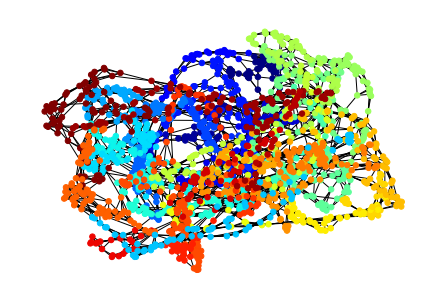

In [23]:
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

### Assign data point color based on community in realspace

In [24]:
label = np.zeros((len(XYZ_C),1))

# get the nodes' label based on the nodes' order
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[str(i+1)] == j:           
            label[i] = j
labelRE = np.reshape(label, len(XYZ_C))  
print(labelRE)          

[ 0.  1.  1. ... 39. 13. 13.]


## Plot Result

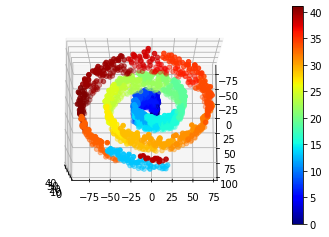

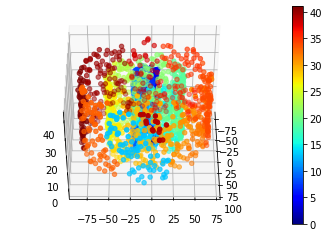

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax1 = ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)
fig1.colorbar(ax1)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax2 = ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)
fig2.colorbar(ax2)

# Using K-Mean instead of modularity

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

best = -2
source = XYZ_Edges['Source']
target = XYZ_Edges['Target']
for j in range(int(size)):
    kmeans = KMeans(n_clusters = (j+1), max_iter = 1000).fit(XYZ_E)
    label = [0] * XYZ_C.shape[0]
    for i in range(len(label)) :
        label[i] = np.zeros((1, int(size))).astype(int)
    for i in range(kmeans.labels_.shape[0]) :
        label[source[i]-1][0][kmeans.labels_[i]] = label[source[i]-1][0][kmeans.labels_[i]] + 1
        label[target[i]-1][0][kmeans.labels_[i]] = label[target[i]-1][0][kmeans.labels_[i]] + 1
    for i in range(len(XYZ_C)) :
        label[i] = np.argmax(label[i][0])
    #labelRE = np.reshape(label, len(XYZ_C))
    avg = metrics.silhouette_score(XYZ_C, labelRE)
    if avg > best :
        best = avg
        final_label = labelRE
final_label = np.reshape(final_label, len(XYZ_C))

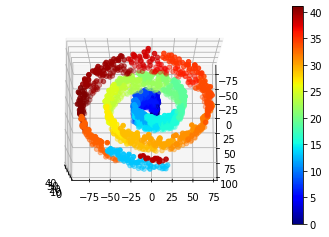

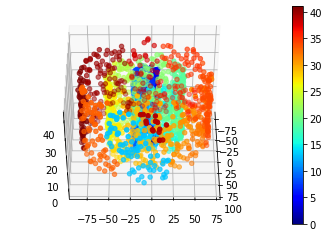

In [30]:
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = final_label
ax1 = ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)
fig1.colorbar(ax1)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = final_label
ax2 = ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)
fig2.colorbar(ax2)